In [ ]:
#1.made training data(human face,moon text coin)
#2.ganerate random sample using patch extractor
#3.x_train=convert in array to feature vector of hog using feature.hog(image)
#4.put y_train =0 or 1
#5.fit on SVM
#6.resize test image obtain HOG using np.array([feature.hog(test_image)])
#7.predict using SVM



In [ ]:
from skimage import data, feature, transform
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from skimage.io import imread
from itertools import chain
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor
import numpy as np

In [2]:
# we can load a data-set of human faces (positive samples)
human_faces = fetch_lfw_people()
positive_images = human_faces.images[:10000]

# fetch a data-set without faces (negative samples)

non_face_topics = ['moon', 'text', 'coins']

negative_samples = [(getattr(data, name)()) for name in non_face_topics]

In [3]:
# we will use PatchExtractor to generate several variants of these images
def generate_random_samples(image, num_of_generated_images=100, patch_size=positive_images[0].shape):
    extractor = PatchExtractor(patch_size=patch_size, max_patches=num_of_generated_images, random_state=42)
    patches = extractor.transform((image[np.newaxis]))
    return patches

In [4]:
# we generate 3000 samples (negative samples without a human face)
negative_images = np.vstack([generate_random_samples(im, 1000) for im in negative_samples])

# we construct the training set with the output variables (labels)
# and we have to construct the HOG features

X_train = np.array([feature.hog(image) for image in chain(positive_images, negative_images)])
# labels - 0 and 1 // 1: face 0: non-face
y_train = np.zeros(X_train.shape[0])
y_train[:positive_images.shape[0]] = 1

# we can construct the SVM
svm = LinearSVC()
# this is when SVM learns the parameters for the model based on the training dataset
svm.fit(X_train, y_train)


LinearSVC()

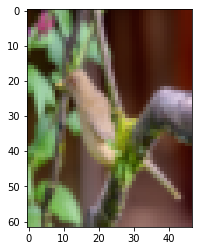

Prediction made by SVM: 0.000000


In [7]:
# read the test images
test_image = imread(fname='bird.jpg')
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

test_image_hog = np.array([feature.hog(test_image)])
prediction = svm.predict(test_image_hog)
print("Prediction made by SVM: %f" % prediction)


In [ ]:
# read the test images
test_image = imread(fname='bird.jpg')
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

test_image_hog = np.array([feature.hog(test_image)])
prediction = svm.predict(test_image_hog)
print("Prediction made by SVM: %f" % prediction)